In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
import statsmodels.formula.api as smf
%matplotlib inline


In [2]:
results = {}

with open("learned_batching_samples_more_data.txt", "r") as f:
    lines = f.readlines()
    for i in range(len(lines)):
#     for line in f.readlines():
        line = lines[i]
        if "GREPTHIS" in line:
            splits = line.strip().split("XXXXXX")
#             print splits[0]
            res = json.loads(splits[1].strip())
            results[res["name"]] = res
#             model = splits[-2]
#             s = "["
#             j = i + 1
#             while "]" not in line:
#                 line = lines[j]
#                 s += line
#                 j += 1
#             results[model] = json.loads(s)
#             i = j

/Users/crankshaw/anaconda2/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/crankshaw/anaconda2/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/crankshaw/anaconda2/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/crankshaw/anaconda2/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/crankshaw/anaconda2/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning

[u'alpha', u'beta', u'measurements', u'name', u'batch_size']
   batch_size  latencies
0           3       7889
1           5       1674
2           7       1660
3           9       1792
4          11       2164
linear_svm 438


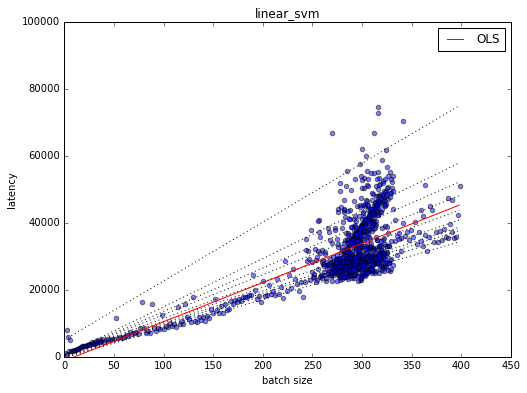

[u'alpha', u'beta', u'measurements', u'name', u'batch_size']
   batch_size  latencies
0           3       7697
1           5       7402
2           7       7437
3           9       7275
4          11       7308
rf_d16 416


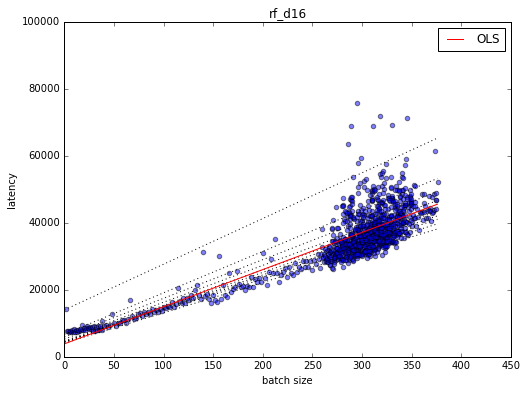

[u'alpha', u'beta', u'measurements', u'name', u'batch_size']
   batch_size  latencies
0           3       5435
1           5       1370
2           7       1757
3           9       1770
4          11       2169
logistic_reg 380


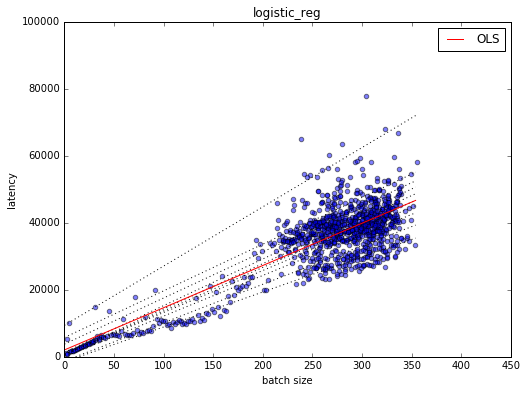

[u'alpha', u'beta', u'measurements', u'name', u'batch_size']
   batch_size  latencies
0           3       7761
1           5       7633
2           7       7598
3           9       7551
4          11       7497
rf_d8 398


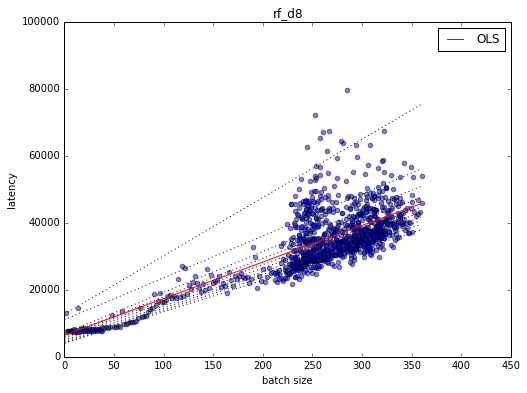

/Users/crankshaw/anaconda2/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/crankshaw/anaconda2/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/crankshaw/anaconda2/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/crankshaw/anaconda2/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/crankshaw/anaconda2/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning

[u'alpha', u'beta', u'measurements', u'name', u'batch_size']
   batch_size  latencies
0           3        904
1           5       1316
2           7       1774
3           9       1982
4          11       2332
spark_svm 390


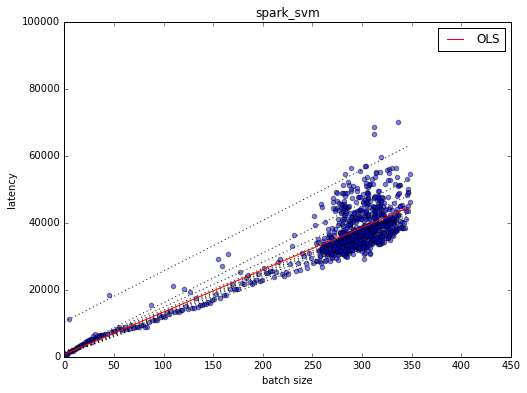

In [9]:



def process_batch(name, batches, latencies):
    quantiles = np.arange(0.09, 0.999, 0.1)
    
    
    df = pd.DataFrame({"batch_size": batches, "latencies": latencies})
    print df.head()
    mod = smf.quantreg('latencies ~ batch_size', df)
    def fit_model(q):
        model_fit = mod.fit(q=q)
        return [q, model_fit.params['Intercept'], model_fit.params['batch_size']] + model_fit.conf_int().ix['batch_size'].tolist()    
    models = [fit_model(cur_q) for cur_q in quantiles]
    models = pd.DataFrame(models, columns=['q', 'a', 'b','lb','ub'])
    
    ols = smf.ols('latencies ~ batch_size', df).fit()
    ols_ci = ols.conf_int().ix['batch_size'].tolist()
    ols = dict(a = ols.params['Intercept'],
               b = ols.params['batch_size'],
               lb = ols_ci[0],
               ub = ols_ci[1])
    
#     print models
#     print ols

    print results[model]["name"], results[model]["batch_size"]
#     fig, ax = plt.subplots(figsize=(8,6))
    
    
    
    x = np.arange(0, df.batch_size.max(), 1)
    get_y = lambda a, b: a + b * x

    fig, ax = plt.subplots(figsize=(8, 6))

    for i in range(models.shape[0]):
        y = get_y(models.a[i], models.b[i])
        ax.plot(x, y, linestyle='dotted', color='black')

    y = get_y(ols['a'], ols['b'])

    ax.plot(x, y, color='red', label='OLS')
#     ax.scatter(data.income, data.foodexp, alpha=.2)
    ax.set_xlim((0, 450))
    ax.set_ylim((0, 100000))
    
    
    
    ax.scatter(batches, latencies, alpha=0.5)
    legend = ax.legend()
#     ax.set_xlabel('Income', fontsize=16)
#     ax.set_ylabel('Food expenditure', fontsize=16);
    ax.set_title(name)
    ax.set_ylabel("latency")
    ax.set_xlabel("batch size")
    plt.show()



for model in results:
    print results[model].keys()
    batches = []
    latencies = []
    for m in results[model]["measurements"]:
        latencies.append(m["latency"])
        batches.append(m["batch_size"])
    process_batch(model, batches, latencies)
    
    

In [ ]:
%pwd

In [ ]:
import statsmodels.regression.quantile_regression as qr

In [ ]:
qr?

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
smf?